In [7]:
import csv
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import os

In [2]:
#Saving the swap data
dataSwap1 = pd.read_csv("jpsi_mu_pi_swap.csv")
dataSwap1.loc[:, "target"] = 1
dataSwap2 = pd.read_csv("jpsi_mu_k_swap.csv")
dataSwap2.loc[:, "target"] = 1
dataSwap3 = pd.read_csv("k_pi_swap.csv")
dataSwap3.loc[:, "target"] = 1

#Saving the signal data
dataSignal = pd.read_csv("signal.csv")
dataSignal.loc[:, "target"] = 0

#Combining the files
data = dataSwap1.append(dataSignal, ignore_index=True)
data = data.append(dataSwap2, ignore_index=True)
data = data.append(dataSwap3, ignore_index=True)

dataSwap1 = dataSwap1.append(dataSignal, ignore_index=True)
dataSwap2 = dataSwap2.append(dataSignal, ignore_index=True)
dataSwap3 = dataSwap3.append(dataSignal, ignore_index=True)

dataSwap1 = dataSwap1.sample(frac=1)
dataSwap2 = dataSwap2.sample(frac=1)
dataSwap3 = dataSwap3.sample(frac=1)

#Removing the columns with a corelation to the result
X1 = dataSwap1.iloc[:, 2:98] #Data 
y1 = dataSwap1.iloc[:, 100] #Targe

X2 = dataSwap2.iloc[:, 2:98] #Data 
y2 = dataSwap2.iloc[:, 100] #Targe

X3 = dataSwap3.iloc[:, 2:100] #Data 
y3 = dataSwap3.iloc[:, 101] #Targe

C:\Users\alexa\AppData\Local\Temp\ipykernel_19056\1282437770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataSwap1.append(dataSignal, ignore_index=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_19056\1282437770.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataSwap2, ignore_index=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_19056\1282437770.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataSwap3, ignore_index=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_19056\1282437770.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataSwap1 = dataSwap1.append(dataSi

In [3]:
print(y3)

130511    0
222680    0
53787     1
160493    0
213165    0
         ..
51213     1
179866    0
207087    0
64720     1
167076    0
Name: target, Length: 300000, dtype: int64


In [4]:
#Doing the machine learning using xgboost and binary logistic
seed = 42
test_size = 0.2

#Creating the three different data sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=test_size, random_state=seed, stratify = y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=test_size, random_state=seed, stratify = y2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=test_size, random_state=seed, stratify = y3)

#ML process
model1 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)
model2 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)
model3 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)

model1.fit(X_train1,y_train1,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test1, y_test1)])
model2.fit(X_train2,y_train2,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test2, y_test2)])
model3.fit(X_train3,y_train3,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test3, y_test3)])

C:\Users\alexa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-logloss:0.43886
[1]	validation_0-logloss:0.29844
[2]	validation_0-logloss:0.20993
[3]	validation_0-logloss:0.15072
[4]	validation_0-logloss:0.10980
[5]	validation_0-logloss:0.08077
[6]	validation_0-logloss:0.06005
[7]	validation_0-logloss:0.04504
[8]	validation_0-logloss:0.03406
[9]	validation_0-logloss:0.02602
[10]	validation_0-logloss:0.02012
[11]	validation_0-logloss:0.01579
[12]	validation_0-logloss:0.01250
[13]	validation_0-logloss:0.01004
[14]	validation_0-logloss:0.00830
[15]	validation_0-logloss:0.00691
[16]	validation_0-logloss:0.00591
[17]	validation_0-logloss:0.00517
[18]	validation_0-logloss:0.00461
[19]	validation_0-logloss:0.00421
[20]	validation_0-logloss:0.00387
[21]	validation_0-logloss:0.00362
[22]	validation_0-logloss:0.00349
[23]	validation_0-logloss:0.00334
[24]	validation_0-logloss:0.00323
[25]	validation_0-logloss:0.00316
[26]	validation_0-logloss:0.00308
[27]	validation_0-logloss:0.00303
[28]	validation_0-logloss:0.00298
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

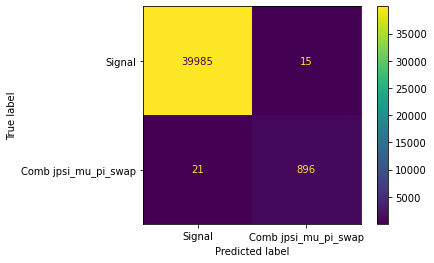

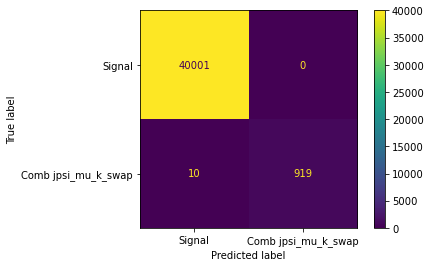

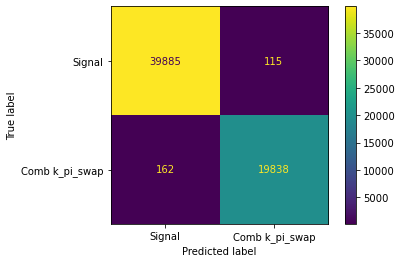

In [5]:
plot_confusion_matrix(model1, X_test1, y_test1, values_format="d", display_labels=["Signal", "Comb jpsi_mu_pi_swap"])
plot_confusion_matrix(model2, X_test2, y_test2, values_format="d", display_labels=["Signal", "Comb jpsi_mu_k_swap"])
plot_confusion_matrix(model3, X_test3, y_test3, values_format="d", display_labels=["Signal", "Comb k_pi_swap"])

In [23]:
#Prediction for the first model
y_pred1 = model1.predict(data.iloc[:, 2:98])

#Selecting the masses using the model
mass = []
mass1 = []
massNo1 = []
massNo2 = []
massNo3 = []
for i in range(len(y_pred1)):
    if y_pred1[i] == 1:
        mass1.append(data["B0_M"][i])
    if y_pred1[i] == 0:
        massNo1.append(data["B0_M"][i])
        
#Prediction for the second model
y_pred2 = model2.predict(data.iloc[:, 2:98])

#Selecting the masses using the model
for i in range(len(y_pred2)):
    if y_pred2[i] == 1:
        mass.append(data["B0_M"][i])
    else:
        massNo2.append(data["B0_M"][i])

#Prediction for the third model
y_pred3 = model3.predict(data.iloc[:, 2:100])

#Selecting the masses using the model
for i in range(len(y_pred3)):
    if y_pred3[i] == 1:
        mass.append(data["B0_M"][i])
    else:
        massNo3.append(data["B0_M"][i])

In [24]:
print(len(mass1))

4631


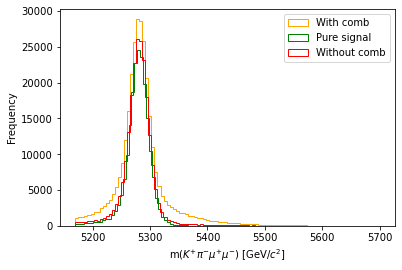

In [7]:
#All the masses
x, y=np.histogram(data["B0_M"], bins=100)

#Signal mass comparison
x1, y1 = np.histogram(dataSignal["B0_M"], bins=100)

#Plotting the histogram of mass
freq, edges = np.histogram(mass, bins=100)
centres = (edges[:-1] + edges[1:])/2.
#pl.errorbar(centres, freq, yerr=np.sqrt(freq), ls = 'none', elinewidth=1)

centres = (y[:-1] + y[1:])/2.
pl.hist(data["B0_M"], color="white", ec="orange", bins=100, label="With comb", histtype='step')

centres = (y1[:-1] + y1[1:])/2.
pl.hist(dataSignal["B0_M"], color="white", ec="green", bins=100, label="Pure signal", histtype='step')

pl.hist(mass, color="white", ec="red",bins=100, label="Without comb", histtype='step')

pl.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
pl.ylabel('Frequency')
pl.legend()
pl.show()

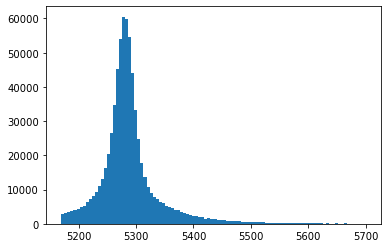

In [22]:
pl.hist(massNo3+massNo1+massNo2, bins=100)
pl.show()

In [25]:
dataSwap1 = pd.read_csv("jpsi_mu_pi_swap.csv")
dataSwap1.loc[:, "target"] = 1
dataSwap2 = pd.read_csv("jpsi_mu_k_swap.csv")
dataSwap2.loc[:, "target"] = 1
dataSwap3 = pd.read_csv("k_pi_swap.csv")
dataSwap3.loc[:, "target"] = 1

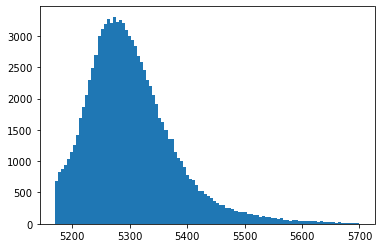

In [32]:
pl.hist(dataSwap3["B0_M"], bins = 100)
pl.show()

In [28]:
dataComb = pd.read_csv("comb.csv")

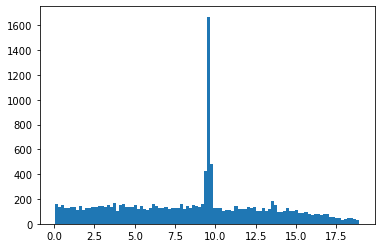

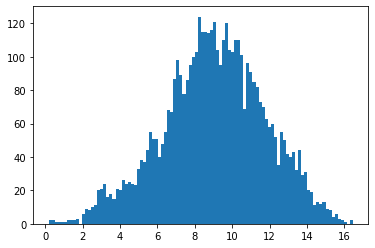

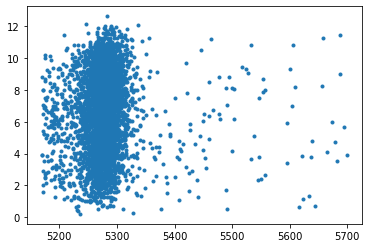

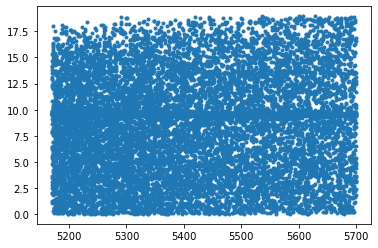

In [40]:
pl.hist(dataComb["q2"], bins=100)
pl.show()

pl.hist(dataSwap2["q2"], bins=100)
pl.show()

pl.plot(dataSwap1["B0_M"], dataSwap1["q2"], '.')
pl.show()
pl.plot(dataComb["B0_M"], dataComb["q2"], '.')

In [155]:
Total = pd.read_csv("total_dataset.csv")

In [55]:
#Prediction for the first model
y_pred1 = model1.predict(Total.iloc[:, 2:98])

#Selecting the masses using the model
mass = []
mass1 = []
massNo1 = []
massNo2 = []
massNo3 = []
for i in range(len(y_pred1)):
    if y_pred1[i] == 1:
        mass1.append(Total["B0_M"][i])
    if y_pred1[i] == 0:
        massNo1.append(Total["B0_M"][i])
        
#Prediction for the second model
y_pred2 = model2.predict(Total.iloc[:, 2:98])

#Selecting the masses using the model
for i in range(len(y_pred2)):
    if y_pred2[i] == 1:
        mass.append(Total["B0_M"][i])
    else:
        massNo2.append(Total["B0_M"][i])

#Prediction for the third model
y_pred3 = model3.predict(Total.iloc[:, 2:100])

#Selecting the masses using the model
for i in range(len(y_pred3)):
    if y_pred3[i] == 1:
        mass.append(Total["B0_M"][i])
    else:
        massNo3.append(Total["B0_M"][i])

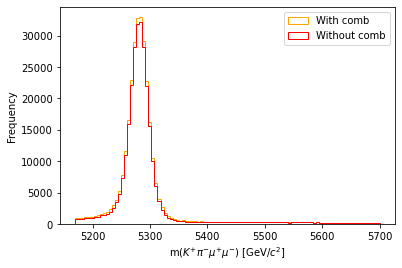

In [57]:
#All the masses
x, y=np.histogram(data["B0_M"], bins=100)

#Signal mass comparison
x1, y1 = np.histogram(dataSignal["B0_M"], bins=100)

#Plotting the histogram of mass
freq, edges = np.histogram(mass, bins=100)
centres = (edges[:-1] + edges[1:])/2.
#pl.errorbar(centres, freq, yerr=np.sqrt(freq), ls = 'none', elinewidth=1)

centres = (y[:-1] + y[1:])/2.
pl.hist(Total["B0_M"], color="white", ec="orange", bins=100, label="With comb", histtype='step')

centres = (y1[:-1] + y1[1:])/2.
#pl.hist(dataSignal["B0_M"], color="white", ec="green", bins=100, label="Pure signal", histtype='step')

pl.hist(mass, color="white", ec="red",bins=100, label="Without comb", histtype='step')

pl.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
pl.ylabel('Frequency')
pl.legend()
pl.show()

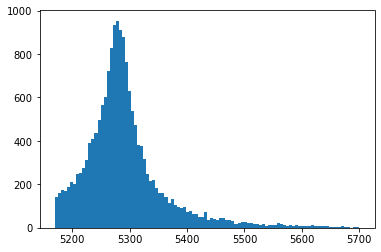

In [60]:
pl.hist(massNo3, bins=100)
#pl.hist(Total["B0_M"], color="white", ec="orange", bins=100, label="With comb", histtype='step')
pl.show()

In [170]:
dataComb = pd.read_csv("comb.csv")
dataComb.loc[:, "target"] = 1

dataSignal = pd.read_csv("signal.csv")
dataSignal.loc[:, "target"] = 0

dataComb = dataComb.append(dataSignal, ignore_index=True)

#dataComb = dataComb.sample(frac=1)

X1 = dataComb.drop("Unnamed: 0.2", axis=1) #Data 
X1 = X1.drop("target", axis=1) #Data 
y1 = dataComb["target"] #Target

#Doing the machine learning using xgboost and binary logistic
seed = 42
test_size = 0.2

#Creating the three different data sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=test_size, random_state=seed, stratify = y1)

#ML process
model1 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)


model1.fit(X_train1,y_train1,verbose=False,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test1, y_test1)])


C:\Users\alexa\AppData\Local\Temp\ipykernel_19056\4269310000.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataComb = dataComb.append(dataSignal, ignore_index=True)
C:\Users\alexa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [171]:
#print(X1)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


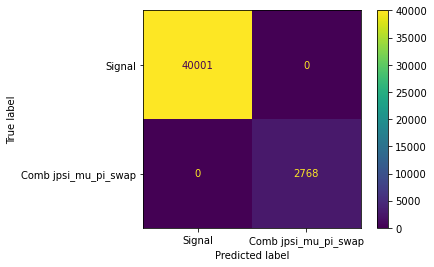

In [172]:
plot_confusion_matrix(model1, X_test1, y_test1, values_format="d", display_labels=["Signal", "Comb jpsi_mu_pi_swap"])

In [173]:
q2 = Total["q2"]
Total = Total[(0 < q2) & (q2 < 0.98) | (1.1 < q2) & (q2 < 8) | (11 < q2) & (q2 < 12.5)| (q2 > 15)]


In [179]:
Total.tolist()

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [180]:
#Prediction for the first model
y_pred1 = model1.predict(Total)

#Selecting the masses using the model
mass = []
mass1 = []
massNo1 = []
massNo2 = []
massNo3 = []
for i in range(len(y_pred1)):
    if y_pred1[i] == 0:
        mass.append(Total["B0_M"].tolist()[i])
    if y_pred1[i] == 1:
        massNo1.append(Total["B0_M"].tolist()[i])

In [181]:
print(len(mass))

16564


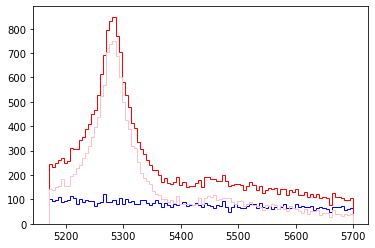

In [182]:
pl.hist(massNo1, bins=100, color="white", ec="Blue", label="Without comb", histtype='step')
pl.hist(Total["B0_M"], bins=100, color="white", ec="red", label="Without comb", histtype='step')
pl.hist(mass, bins=100, color="white", ec="pink", label="Without comb", histtype='step')
pl.show()

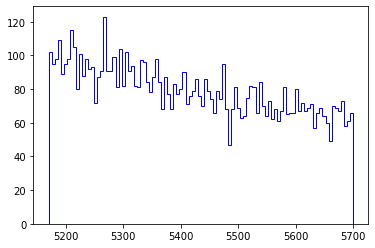

In [183]:
pl.hist(massNo1, bins=100, color="white", ec="Blue", label="Without comb", histtype='step')
pl.show()

In [203]:
dataWTF = pd.read_csv("jpsi.csv")
dataComb = pd.read_csv("comb.csv")

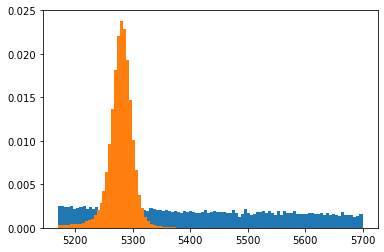

In [204]:
pl.hist(dataComb["B0_M"], bins=100, density = True)
pl.hist(dataSignal["B0_M"], bins=100, density = True)
pl.show()

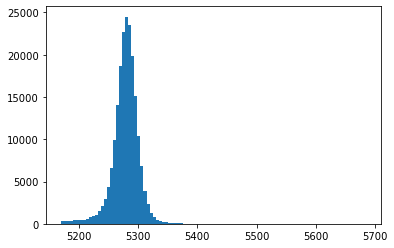

In [201]:
pl.hist(dataSignal["B0_M"], bins=100)
pl.show()

In [38]:
TrainData = pd.read_csv("signal.csv")
TrainData.loc[:, "target"] = 0

for file in os.listdir("BackgroundData"):
    if (file != ".ipynb_checkpoints"):
        print(file)
        data = pd.read_csv("BackgroundData/" + file, on_bad_lines='skip')
        data.loc[:, "target"] = 1
        
        TrainData = TrainData.append(data, ignore_index=True)

TrainData= TrainData.drop(["mu_plus_PE", "Pi_ETA"], axis = 1)

X1 = TrainData.drop("target", axis=1) #Data 
y1 = TrainData["target"] #Targe

#Doing the machine learning using xgboost and binary logistic
seed = 42
test_size = 0.2

#Creating the three different data sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=test_size, random_state=seed, stratify = y1)

#ML process
model1 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)

model1.fit(X_train1,y_train1,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test1, y_test1)])


jpsi.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)


Jpsi_Kstarp_pi0.csv
jpsi_mu_k_swap.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)


jpsi_mu_pi_swap.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)


Kmumu.csv
Kstarp_pi0.csv
k_pi_swap.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)


phimumu.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:7: DtypeWarning: Columns (12,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("BackgroundData/" + file, on_bad_lines='skip')
C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)


pKmumu_piTok_kTop.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)


pKmumu_piTop.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)


psi2S.csv


C:\Users\alexa\AppData\Local\Temp\ipykernel_3400\3891852436.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TrainData = TrainData.append(data, ignore_index=True)
C:\Users\alexa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-logloss:0.47200
[1]	validation_0-logloss:0.34732
[2]	validation_0-logloss:0.27112
[3]	validation_0-logloss:0.21918
[4]	validation_0-logloss:0.18011
[5]	validation_0-logloss:0.15130
[6]	validation_0-logloss:0.13191
[7]	validation_0-logloss:0.11575
[8]	validation_0-logloss:0.10355
[9]	validation_0-logloss:0.09481
[10]	validation_0-logloss:0.08405
[11]	validation_0-logloss:0.07599
[12]	validation_0-logloss:0.07155
[13]	validation_0-logloss:0.06796
[14]	validation_0-logloss:0.06499
[15]	validation_0-logloss:0.06078
[16]	validation_0-logloss:0.05906
[17]	validation_0-logloss:0.05634
[18]	validation_0-logloss:0.05446
[19]	validation_0-logloss:0.05270
[20]	validation_0-logloss:0.05081
[21]	validation_0-logloss:0.05007
[22]	validation_0-logloss:0.04904
[23]	validation_0-logloss:0.04849
[24]	validation_0-logloss:0.04657
[25]	validation_0-logloss:0.04487
[26]	validation_0-logloss:0.04365
[27]	validation_0-logloss:0.04335
[28]	validation_0-logloss:0.04309
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


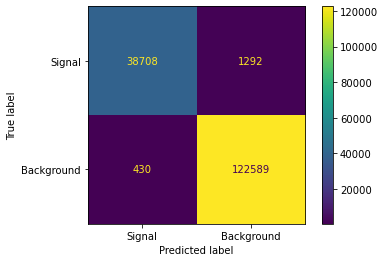

In [39]:
plot_confusion_matrix(model1, X_test1, y_test1, values_format="d", display_labels=["Signal", "Background"])

In [40]:
total = pd.read_csv("total_dataset.csv")

In [57]:
#Prediction for the first model
y_pred1 = model1.predict(total.drop(["Unnamed: 0.1"], axis = 1))

#Selecting the masses using the model
mass = []
massNo1 = []
for i in range(len(y_pred1)):
    if y_pred1[i] == 0:
        mass.append(total["B0_M"].tolist()[i])
    if y_pred1[i] == 1:
        massNo1.append(total["B0_M"].tolist()[i])

KeyboardInterrupt: 

In [ ]:
pl.hist(mass, bins=100)
pl.show()